In [ ]:
# Import the Libraries -
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Supress the warnings -
import warnings
warnings.filterwarnings("ignore")

# Data Understanding

In [ ]:
# read the file -
Cars = pd.read_csv("/content/CarPrice_Assignment.csv")
Cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Data Dictonary

In [ ]:
# Symboling : -2(least risky) to +3 most risky
Cars['symboling'].astype('object').value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [ ]:
"""aspiration: An (internal combustion) engine property showing 
whether the oxygen intake is through standard (atmospheric pressure)
or through turbocharging (pressurised oxygen intake)"""

Cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [ ]:
# Drive wheel 
Cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

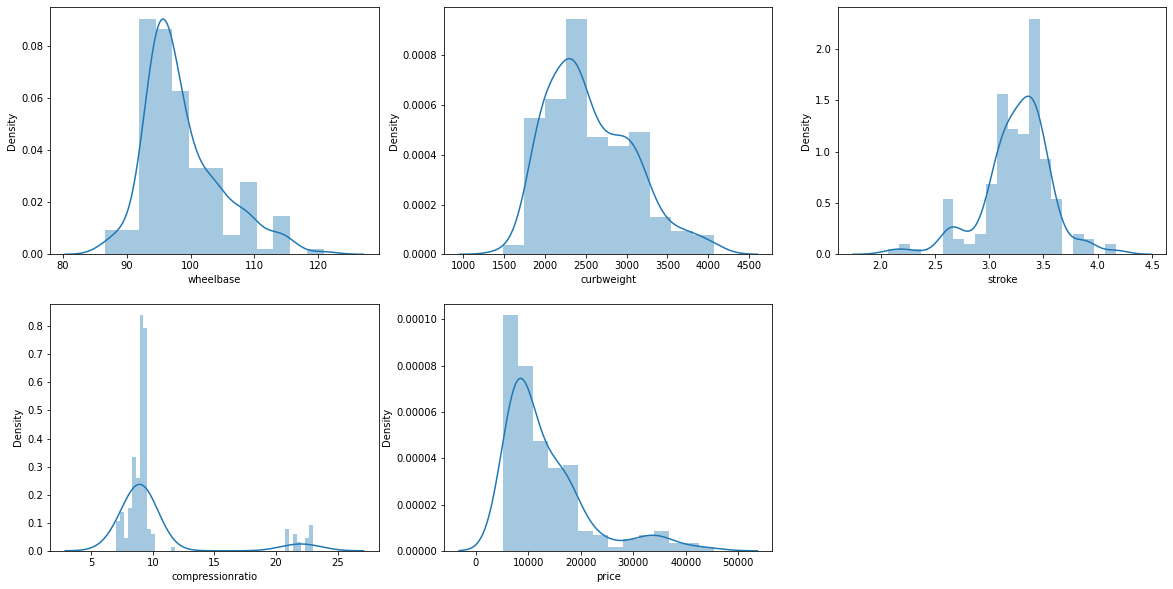

In [ ]:
# Check the distribution plot for following-
distribution = ['wheelbase', 'curbweight','stroke','compressionratio', 'price']

"""
1. wheelbase: distance between centre of front and rarewheels
2. curbweight: weight of car without occupants or baggage
3. stroke: volume of the engine (the distance traveled by the 
piston in each cycle)
4. compression ration: ratio of volume of compression chamber 
at largest capacity to least capacity
"""
plt.figure(figsize=[20,10])
for i, j in enumerate(distribution) :
  plt.subplot(2,3,i+1)
  sns.distplot(Cars[j])
plt.show()

## Data Exploration 

In [ ]:
# Numeric Variables 
car_numeric = Cars.select_dtypes(include=["float64","int64"])
car_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Car_id and symboling needs to be droped -
car_numeric = car_numeric.drop(["car_ID","symboling"], axis =1)
car_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


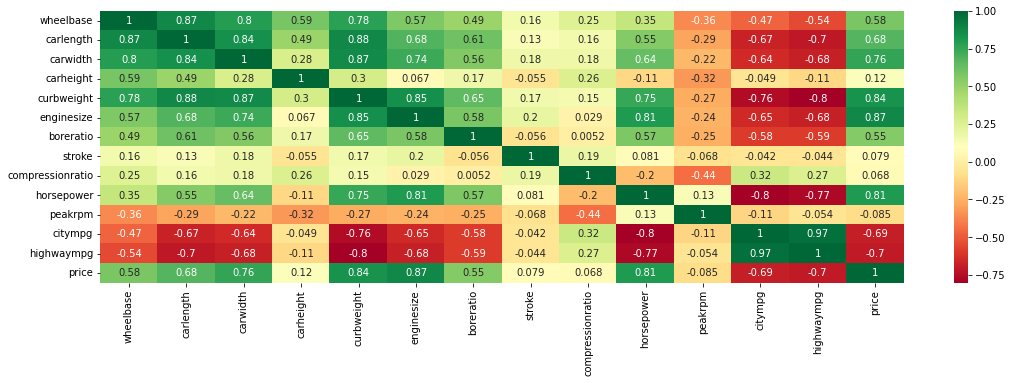

In [ ]:
# Find the correlation -
corr = car_numeric.corr()
plt.figure(figsize=[18,5])
sns.heatmap(corr,cmap='RdYlGn',annot=True)
plt.show()

- Variable such as carlenght, carwidth, curbweight, enginesize, horsepower are highly correlated to Price. Notice that this variables are related to engine power/size/weight
- The parameters such as citympg, highwaympg are negatively correlated, indicating that high mileage vehicle falls in the economical class.
- Lot of parameters are highly correlated, hence we need to deal with the same while modeling.

# Data Cleaning

In [ ]:
# Convert the data category of symboling -
Cars["symboling"] = Cars["symboling"].astype("object")
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# Get the car company name from car name 
Cars.CarName.value_counts()

toyota corona                      6
toyota corolla                     6
peugeot 504                        6
subaru dl                          4
mitsubishi mirage g4               3
mazda 626                          3
toyota mark ii                     3
mitsubishi outlander               3
mitsubishi g4                      3
honda civic                        3
volvo 264gl                        2
bmw 320i                           2
isuzu D-Max                        2
audi 100ls                         2
volvo 244dl                        2
porsche cayenne                    2
toyota corolla liftback            2
honda accord                       2
bmw x3                             2
volvo 144ea                        2
volvo 145e (sw)                    2
honda civic cvcc                   2
saab 99le                          2
toyota starlet                     2
saab 99gle                         2
toyota corolla 1200                2
mazda rx-4                         2
m

In [ ]:
Cars["Company_Name"]= Cars["CarName"].apply(lambda x: x.split(" ")[0])

In [ ]:
# Alternate method to get the text -
import re
pattern = re.compile(r'\w+-?\w+')
carnames = Cars["CarName"].apply(lambda x : re.findall(pattern,x)[0])
carnames.head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarName, dtype: object

In [ ]:
Cars["Company_Name"].astype("object").value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: Company_Name, dtype: int64

- Some of the companies names are misspelled 

In [ ]:
Cars["Company_Name"] = Cars["Company_Name"].replace({'vw':'volkswagen','vokswagen': 'volkswagen',
                              'porcshce':'porsche', 'toyouta':'toyota',
                              'Nissan': 'nissan', 'maxda':'mazda'})
Cars["Company_Name"].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: Company_Name, dtype: int64

In [ ]:
# Drop the column CarName, car_ID -
Cars = Cars.drop(['CarName','car_ID'],axis=1)

In [ ]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [ ]:
# Check for the outliers
Cars.describe(percentiles = [0.25,0.50,0.75,0.95,0.99,1]).T

,count,mean,std,min,25%,50%,75%,95%,99%,100%,max
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,110.00,115.544,120.90,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,196.36,202.480,208.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,70.46,71.700,72.30,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,57.50,59.100,59.80,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,3503.00,3948.000,4066.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,201.20,302.160,326.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.78,3.800,3.94,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,3.64,3.900,4.17,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,21.82,23.000,23.00,23.00
horsepower,205.0,104.117073,39.544167,48.00,70.00,95.00,116.00,180.80,207.000,288.00,288.00


- No outliers present

# Data Preparation

In [ ]:
# Split the data in X and y -
y = Cars.pop("price")
X = Cars

In [ ]:
# Check the unique value count in each categorical variable-
Cars_categorical = Cars.select_dtypes('object').columns
for i in Cars_categorical:
  print(i)
  print(Cars[i].value_counts())
  print("----------------------------\n")

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
----------------------------

fueltype
gas       185
diesel     20
Name: fueltype, dtype: int64
----------------------------

aspiration
std      168
turbo     37
Name: aspiration, dtype: int64
----------------------------

doornumber
four    115
two      90
Name: doornumber, dtype: int64
----------------------------

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
----------------------------

drivewheel
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
----------------------------

enginelocation
front    202
rear       3
Name: enginelocation, dtype: int64
----------------------------

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
----------------------------

cylindernumber
four      159
six        24
five       11

In [ ]:
# Treat the categorical data -
X = pd.get_dummies(data=X , columns = Cars_categorical, drop_first = True)
X.shape

(205, 68)

In [ ]:
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Company_Name_audi',
       'Company_Name_bmw', 'Company_Name_buick', 'Company_Name_chevrole

In [ ]:
# Split the Data in test and train -
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7 ,random_state=100)
X_train.shape, X_test.shape

((143, 68), (62, 68))

# Model Building and Evaluation

## Linear Regression

In [ ]:
# Linear Regression 
LR = LinearRegression()
# Fit the data
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Coefficient and Intercept
print(LR.intercept_)
print(LR.coef_)

-12262.727523398891
[ 2.14421976e+02 -8.52797910e+01  7.88959347e+02 -5.16517895e+02
  4.65966570e+00  2.79876136e+02 -1.79522844e+04 -3.62572802e+03
 -6.48485295e+02 -2.46819786e+01  2.85152354e+00 -4.01182750e+01
  1.08337704e+02  2.37898686e+03  1.70939844e+03  1.59451424e+03
  1.78469417e+03  1.03662723e+03 -4.06725230e+03  2.63261136e+03
 -4.70282056e+02 -3.97246807e+03 -3.87264411e+03 -3.32995865e+03
 -2.78876583e+03 -1.88557268e+02  9.16803170e+02  6.99541955e+03
  7.90207869e+03  8.01991671e+03  3.48044990e+02  6.09921124e+03
 -1.18825955e+03  1.47158215e+04  9.76899715e+03  1.62784140e+04
  4.33190801e+03  1.79193961e+04 -1.50641478e+04  1.47158215e+04
  9.65008368e+02 -1.36821185e+03  4.06725230e+03  1.81898940e-11
 -4.19297986e+02 -2.84986353e+02 -8.18545232e-12  2.87202437e+03
  1.23676928e+04  1.94571482e+03 -1.52666052e+03 -3.40888754e+03
 -2.13267984e+03  4.36187917e+02 -4.09892163e+03  1.12706878e+03
 -2.95585778e-12 -4.34803256e+03  1.27608209e+03 -9.89947935e+03
 -3.7

In [ ]:
#Predictions -
y_pred_train_LR = LR.predict(X_train)
y_pred_test_LR = LR.predict(X_test)

# Evaluation metrics -
Metrics_LR = []

r2_train_LR = r2_score(y_train, y_pred_train_LR)
print(r2_train_LR)
Metrics_LR.append(r2_train_LR)

r2_test_LR = r2_score(y_test, y_pred_test_LR)
print(r2_test_LR)
Metrics_LR.append(r2_test_LR)

rss_train_LR = np.sum(np.square(y_train-y_pred_train_LR))
print(rss_train_LR)
Metrics_LR.append(rss_train_LR)

rss_test_LR = np.sum(np.square(y_test-y_pred_test_LR))
print(rss_test_LR)
Metrics_LR.append(rss_test_LR)

mse_LR_train = mean_squared_error(y_train, y_pred_train_LR)
print(mse_LR_train)
Metrics_LR.append(mse_LR_train**0.5)

mse_LR_test = mean_squared_error(y_test, y_pred_test_LR)
print(mse_LR_test)
Metrics_LR.append(mse_LR_test**0.5)

0.9756892503873289
0.8382621393398924
210406502.35365206
702234087.1203064
1471374.1423332312
11326356.24387591


## Ridge Regression

In [ ]:
# Instantiate the class 
ridge = Ridge()

# Decide the parameters to tune.
"""
Larger value of Alpha will lead to underfitting
Lower Value will not avoid overfitting
"""
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
          0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
          4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [ ]:
# Using GridSearchCV, find out the best fit -
folds = 5
model_CV = GridSearchCV(estimator = ridge, param_grid = params,
                        scoring = 'neg_mean_absolute_error',
                        cv= folds, n_jobs = -1, verbose = 1,
                        return_train_score= True)

model_CV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Find the best hyperparameter 
print(model_CV.best_params_)
ridge_best = model_CV.best_estimator_

{'alpha': 1.0}


In [ ]:
# Get the coefficient -
ridge_best.coef_

array([ 8.81764708e+01, -8.73720730e+01,  7.05987536e+02, -6.54120858e+01,
        5.49599096e+00,  8.69012633e+01, -1.40487219e+03, -1.89247699e+03,
       -1.40702334e+02,  3.33516169e+00,  1.86889975e+00, -1.84885008e+01,
        1.30178333e+02,  1.24712330e+03,  4.54585829e+02,  5.95198026e+02,
        2.11965330e+02,  1.02184683e+03, -9.86821728e+02,  1.57894140e+03,
        2.72341973e+01,  2.14345264e+02, -1.87755182e+03, -1.19134024e+03,
       -1.42046033e+03, -3.50445239e+02,  8.79504246e+02,  3.35809929e+03,
       -8.56701337e+02, -2.49450063e+02,  1.50276414e+03,  1.63583733e+03,
       -2.00576046e+03,  1.52831737e+03, -1.89276213e+03, -1.65201183e+03,
       -7.73913461e+02,  1.81183637e+03, -2.03855940e+03,  1.52831737e+03,
        5.24219519e+02, -3.57009511e+01,  9.86821728e+02,  0.00000000e+00,
        2.37124845e+02, -3.95858422e+02,  0.00000000e+00,  9.12383006e+02,
        5.66253718e+03,  2.06312180e+03, -7.15465972e+02, -1.88587779e+03,
       -1.32219470e+03, -

In [ ]:
# Make the prediction using the best estimator -
y_pred_ridge_train = ridge_best.predict(X_train)
y_pred_ridge_test = ridge_best.predict(X_test)

# Evaluation metrics -
Metrics_ridge = []

r2_train_ridge = r2_score(y_train, y_pred_ridge_train)
print(r2_train_ridge)
Metrics_ridge.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_ridge_test)
print(r2_test_ridge)
Metrics_ridge.append(r2_test_ridge)

rss_train_ridge = np.sum(np.square(y_train-y_pred_ridge_train))
print(rss_train_ridge)
Metrics_ridge.append(rss_train_ridge)

rss_test_ridge = np.sum(np.square(y_test-y_pred_ridge_test))
print(rss_test_ridge)
Metrics_ridge.append(rss_test_ridge)

mse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train)
print(mse_ridge_train)
Metrics_ridge.append(mse_ridge_train**0.5)

mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test)
print(mse_ridge_test)
Metrics_ridge.append(mse_ridge_test**0.5)

0.9562745578292032
0.9272250405922522
378438242.24280566
315974608.3962028
2646421.2744252146
5096364.651551658


## Lasso Regression

In [ ]:
# Instantiate the Lasso Regression Class 
lasso = Lasso()

# Use the GridSearchCV for best parameters 
model_CV = GridSearchCV(estimator = lasso, param_grid = params,
                        scoring = 'neg_mean_absolute_error',
                        cv= folds, n_jobs = -1, verbose = 1,
                        return_train_score= True)

model_CV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Best hyperparameter -
print(model_CV.best_params_)
lasso_best = model_CV.best_estimator_

{'alpha': 50}


In [ ]:
# Find the coefficient
lasso_best.coef_

array([ 1.89808273e+01, -9.94022841e+01,  7.27471848e+02, -0.00000000e+00,
        5.84556421e+00,  5.91831249e+01, -0.00000000e+00, -1.01616436e+03,
        8.22827237e+01,  2.41965465e+01,  1.36597663e+00,  0.00000000e+00,
        5.15203934e+01,  0.00000000e+00, -2.58629625e+02, -0.00000000e+00,
       -0.00000000e+00,  7.16216389e+02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -9.12093155e+02,  0.00000000e+00,
       -3.39139044e+02, -7.26244951e+01,  7.21717423e+02,  2.85194533e+03,
       -0.00000000e+00, -0.00000000e+00,  6.81241741e+02,  0.00000000e+00,
       -1.54598964e+03,  0.00000000e+00, -0.00000000e+00, -1.28775784e+03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        2.51600932e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        6.07834506e+03,  2.09394108e+03,  0.00000000e+00, -0.00000000e+00,
       -5.85550192e+01,  

In [ ]:
# Make the prediction using the best estimator -
y_pred_lasso_train = lasso_best.predict(X_train)
y_pred_lasso_test = lasso_best.predict(X_test)

# Evaluation metrics -
Metrics_lasso = []

r2_train_lasso = r2_score(y_train, y_pred_lasso_train)
print(r2_train_lasso)
Metrics_lasso.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_lasso_test)
print(r2_test_lasso)
Metrics_lasso.append(r2_test_lasso)

rss_train_lasso = np.sum(np.square(y_train-y_pred_lasso_train))
print(rss_train_lasso)
Metrics_lasso.append(rss_train_lasso)

rss_test_lasso = np.sum(np.square(y_test-y_pred_lasso_test))
print(rss_test_lasso)
Metrics_lasso.append(rss_test_lasso)

mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)
print(mse_lasso_train)
Metrics_lasso.append(mse_lasso_train**0.5)

mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)
print(mse_lasso_test)
Metrics_lasso.append(mse_lasso_test**0.5)

0.9278736406881324
0.8818502655579123
624244633.8389723
512982987.2289765
4365347.089783023
8273919.14885446


# Compare the Various metrics

In [ ]:
Metrics = pd.DataFrame(columns=['Metrics', 'Linear_Regression', 'Ridge_Regression', 'Lasso_Regression'])
Metrics['Metrics'] = ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)']
Metrics['Linear_Regression'] = Metrics_LR
Metrics['Ridge_Regression'] = Metrics_ridge
Metrics['Lasso_Regression'] = Metrics_lasso
Metrics

,Metrics,Linear_Regression,Ridge_Regression,Lasso_Regression
0,R2 Score (Train),9.756893e-01,9.562746e-01,9.278736e-01
1,R2 Score (Test),8.382621e-01,9.272250e-01,8.818503e-01
2,RSS (Train),2.104065e+08,3.784382e+08,6.242446e+08
3,RSS (Test),7.022341e+08,3.159746e+08,5.129830e+08
4,RMSE (Train),1.213002e+03,1.626782e+03,2.089341e+03
5,RMSE (Test),3.365465e+03,2.257513e+03,2.876442e+03


# Compare various coefficients

In [ ]:
coefficients = pd.DataFrame(index = X.columns)
coefficients['Linear'] = LR.coef_
coefficients['Ridge'] = ridge_best.coef_
coefficients['Lasso'] = lasso_best.coef_
coefficients

,Linear,Ridge,Lasso
wheelbase,2.144220e+02,88.176471,18.980827
carlength,-8.527979e+01,-87.372073,-99.402284
carwidth,7.889593e+02,705.987536,727.471848
carheight,-5.165179e+02,-65.412086,-0.000000
curbweight,4.659666e+00,5.495991,5.845564
enginesize,2.798761e+02,86.901263,59.183125
boreratio,-1.795228e+04,-1404.872186,-0.000000
stroke,-3.625728e+03,-1892.476986,-1016.164362
compressionratio,-6.484853e+02,-140.702334,82.282724
horsepower,-2.468198e+01,3.335162,24.196547
